In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [37]:
df = pd.DataFrame({'Compact_cars': [643, 655, 702], 'Midsize_cars': [469, 427, 525], 'Full_size_cars': [484, 456, 402]})
df

,Compact_cars,Midsize_cars,Full_size_cars
0,643,469,484
1,655,427,456
2,702,525,402


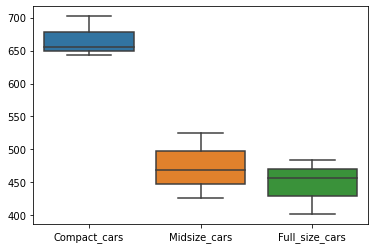

In [6]:
sb.boxplot(data=df);

### Để có thể thực hiện One-way ANOVA, trước hết cần thoả 3 điều kiện sau:
* ĐK1: Các quan sát là độc lập

* ĐK2: Các quần thể có phân phối chuẩn

* ĐK3: Các quần thể có phương sai giống nhau

ĐK1: Vì việc thu thập và chọn mẫu cho 3 loại xe là độc lập nên các quan sát là độc lập với nhau. ĐK1 thoả mãn.  

ĐK2: Thực hiện **Shapiro test** để xem dữ liệu có normal distribution hay không


In [26]:
t_1, p_1 = stats.shapiro(df['Compact_cars'])
t_2, p_2 = stats.shapiro(df['Midsize_cars'])
t_3, p_3 = stats.shapiro(df['Full_size_cars'])

In [27]:
alpha = 0.05
if (p_1 > alpha) & (p_3 > alpha) & (p_3 > alpha):
    print('(p >  alpha) ==> FAIL TO REJECT the H0 that All Data was drawn from a normal distribution.')
else:
    print('(p <= alpha) ==> REJECT the H0 that All Data was drawn from a normal distribution.')

(p >  alpha) ==> FAIL TO REJECT the H0 that All Data was drawn from a normal distribution.


ĐK2 thoả mãn.  

ĐK3: Thực hiện **Levene test** để xem dữ liệu có phương sai giống nhau hay không

In [28]:
t_lev, p_lev = stats.levene(df['Compact_cars'], df['Midsize_cars'], df['Full_size_cars'])

In [29]:
alpha = 0.05
if p_lev > alpha:
    print('(p >  alpha) ==> FAIL TO REJECT the H0 that All Samples are from population with equal variances.')
else:
    print('(p <= alpha) ==> REJECT the H0 that All Samples are from population with equal variances.')

(p >  alpha) ==> FAIL TO REJECT the H0 that All Samples are from population with equal variances.


ĐK3 thoả mãn. 
 
Vậy cả 3 điều kiện đều thoả mãn, thực hiện **One-way ANOVA test** để xem có sự khác biệt đáng kể giữa 3 loại xe hay không?

In [32]:
f_ano, p_ano = stats.f_oneway(df['Compact_cars'], df['Midsize_cars'], df['Full_size_cars'])
p_ano

0.0012071270284831192

In [31]:
alpha = 0.05
if p_ano > alpha:
    print('(p >  alpha) ==> FAIL TO REJECT the H0 that All Groups have the same population mean.')
else:
    print('(p <= alpha) ==> REJECT the H0 that All Groups have the same population mean.')

(p <= alpha) ==> REJECT the H0 that All Groups have the same population mean.


#### Nhận xét: Giá trị p-value thu được từ ANOVA test 0.001207 < alpha 0.05, Reject H0, nên có thể kết luận là có sự khác biệt giữa các loại xe  

Để xét thêm từng cặp loại xe khác nhau ra sao, ta thực hiện hậu kiểm (post-hoc test), chọn Tukey HSD test

In [33]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Compact_cars', 'Midsize_cars', 'Full_size_cars'])
df_melt.columns = ['index', 'cars', 'value']
df_melt

,index,cars,value
0,0,Compact_cars,643
1,1,Compact_cars,655
2,2,Compact_cars,702
3,0,Midsize_cars,469
4,1,Midsize_cars,427
5,2,Midsize_cars,525
6,0,Full_size_cars,484
7,1,Full_size_cars,456
8,2,Full_size_cars,402


In [35]:
m_comp = pairwise_tukeyhsd(endog=df_melt['value'], groups=df_melt['cars'], alpha=0.05)

In [36]:
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1         group2      meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------------
  Compact_cars Full_size_cars -219.3333 0.0015 -322.7791 -115.8876   True
  Compact_cars   Midsize_cars    -193.0  0.003 -296.4458  -89.5542   True
Full_size_cars   Midsize_cars   26.3333 0.7172  -77.1124  129.7791  False
-------------------------------------------------------------------------


#### Nhận xét: Ngoại trừ cặp Full_size_cars và Midsize_cars, tất cả các cặp so sánh khác đều bác bỏ H0, chỉ ra các cặp xe đó có sự khác biệt đáng kể về mặt thống kê